In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
!ls -ltr

total 22836
-rw-r--r--. 1 migordon 1399   15708 Aug 18  2020 TTto2L2Nu.txt
-rw-r--r--. 1 migordon 1399   41132 Aug 18  2020 TTToSemiLeptonic.txt
-rw-r--r--. 1 migordon 1399   14492 Aug 25  2020 Plots.pdf
-rw-r--r--. 1 migordon 1399   37773 Aug 27  2020 August26.pdf
-rw-r--r--. 1 migordon 1399   34610 Sep  2  2020 FTFunctions.cpp
-rw-r--r--. 1 migordon 1399    5774 Sep 21  2020 RealData
-rw-r--r--. 1 migordon 1399   45563 Sep 23  2020 September9.pdf
-rw-r--r--. 1 migordon 1399   45708 Sep 24  2020 September23MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399   46111 Sep 24  2020 September23RealData.pdf
-rw-r--r--. 1 migordon 1399   48733 Oct  9  2020 October8MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399     926 Oct 20  2020 graph.dot.pdf
-rw-r--r--. 1 migordon 1399  145577 Oct 20  2020 October15.pdf
-rw-r--r--. 1 migordon 1399   49188 Nov 11  2020 October8RealData.pdf
-rw-r--r--. 1 migordon 1399  159946 Nov 23  2020 November12.pdf
-rw-r--r--. 1 migordon 1399  159946 Nov 23  2020 November23.pdf
-rw

In [3]:
!mv Combination.root Combination.root_backup
!hadd -f Combination.root 2018_Mu_Data.root 2018_Mu_MonteCarloTTToSemiLeptonic.root 2018_Mu_MonteCarloTTTo2L2Nu.root 2018_Mu_MonteCarloWJetsToLNu.root 2018_Mu_MonteCarloST_tW_top.root 2018_Mu_MonteCarloST_tchannel_top.root

hadd Target file: Combination.root
hadd compression setting for all output: 1
hadd Source file 1: 2018_Mu_Data.root
hadd Source file 2: 2018_Mu_MonteCarloTTToSemiLeptonic.root
hadd Source file 3: 2018_Mu_MonteCarloTTTo2L2Nu.root
hadd Source file 4: 2018_Mu_MonteCarloWJetsToLNu.root
hadd Source file 5: 2018_Mu_MonteCarloST_tW_top.root
hadd Source file 6: 2018_Mu_MonteCarloST_tchannel_top.root
hadd Target path: Combination.root:/


In [4]:
f = ROOT.TFile.Open('Combination.root', 'read')
k = [ff.GetName() for ff in f.GetListOfKeys()]
print(k)

['2018___Mu___Data___leading_isolated_muon_pt___nominal', '2018___Mu___Data___leading_isolated_muon_eta___nominal', '2018___Mu___Data___leading_isolated_muon_phi___nominal', '2018___Mu___Data___leading_isolated_muon_mass___nominal', '2018___Mu___Data___leading_isolated_muon_charge___nominal', '2018___Mu___Data___leading_isolated_electron_pt___nominal', '2018___Mu___Data___leading_isolated_electron_eta___nominal', '2018___Mu___Data___leading_isolated_electron_phi___nominal', '2018___Mu___Data___leading_isolated_electron_mass___nominal', '2018___Mu___Data___leading_isolated_electron_charge___nominal', '2018___Mu___Data___met_before_met_cut___nominal', '2018___Mu___Data___met_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_pt_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_eta_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_phi_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_mass_after_met_cut_

In [5]:
eras = list(set([kk.split("___")[0] for kk in k]))
channels = list(set([kk.split("___")[1] for kk in k]))
samples = list(set([kk.split("___")[2] for kk in k]))
variables = list(set([kk.split("___")[3] for kk in k]))
systematics = list(set([kk.split("___")[4] for kk in k]))

In [6]:
print(eras)
print(channels)
print(samples)
print(variables)
print(systematics)

['2018']
['Mu']
['MonteCarloTTToSemiLeptonic', 'MonteCarloWJetsToLNu', 'Data', 'MonteCarloST_tchannel_top', 'MonteCarloST_tW_top', 'MonteCarloTTTo2L2Nu']
['leading_isolated_muon_charge', 'leading_isolated_electron_pt_after_met_cut', 'leading_isolated_electron_eta_after_met_cut', 'jet1_eta', 'jet2_eta', 'leading_isolated_electron_mass_after_met_cut', 'met_after_met_cut', 'number_of_jets', 'leading_isolated_electron_charge', 'jet2_phi', 'jet1_phi', 'jet2_pt', 'leading_isolated_muon_mass', 'leading_isolated_muon_eta', 'leading_isolated_electron_phi_after_met_cut', 'leading_isolated_electron_pt', 'leading_isolated_muon_pt', 'leading_isolated_electron_phi', 'leading_isolated_electron_mass', 'leading_isolated_muon_phi', 'met_before_met_cut', 'jet1_pt', 'leading_isolated_electron_eta', 'leading_isolated_electron_charge_after_met_cut']
['nominal']


In [7]:
def GetHistos(f, era, channel, variable, systematic = "nominal", separator = "___"):
    
    MC = dict()
    Data = dict()
    
    k = [ff.GetName() for ff in f.GetListOfKeys()]
    print(k)
    k = [kk for kk in k if era == kk.split(separator)[0]]
    k = [kk for kk in k if channel == kk.split(separator)[1]]
    k = [kk for kk in k if variable == kk.split(separator)[3]]
    k = [kk for kk in k if systematic == kk.split(separator)[4]]
    
    for kk in k:
        sample = kk.split(separator)[2]
        
        if "data" in sample.lower():
            Data[sample] = f.Get(kk)
            print("Data")
            
        else:
            MC[sample] = f.Get(kk)
            print(sample)
            
    return MC, Data

In [8]:
x, y = GetHistos(f, "2018", "Mu", "mu_pt")
print(x, y)

['2018___Mu___Data___leading_isolated_muon_pt___nominal', '2018___Mu___Data___leading_isolated_muon_eta___nominal', '2018___Mu___Data___leading_isolated_muon_phi___nominal', '2018___Mu___Data___leading_isolated_muon_mass___nominal', '2018___Mu___Data___leading_isolated_muon_charge___nominal', '2018___Mu___Data___leading_isolated_electron_pt___nominal', '2018___Mu___Data___leading_isolated_electron_eta___nominal', '2018___Mu___Data___leading_isolated_electron_phi___nominal', '2018___Mu___Data___leading_isolated_electron_mass___nominal', '2018___Mu___Data___leading_isolated_electron_charge___nominal', '2018___Mu___Data___met_before_met_cut___nominal', '2018___Mu___Data___met_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_pt_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_eta_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_phi_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_electron_mass_after_met_cut_

KeyError: 'SingleMuon2018'

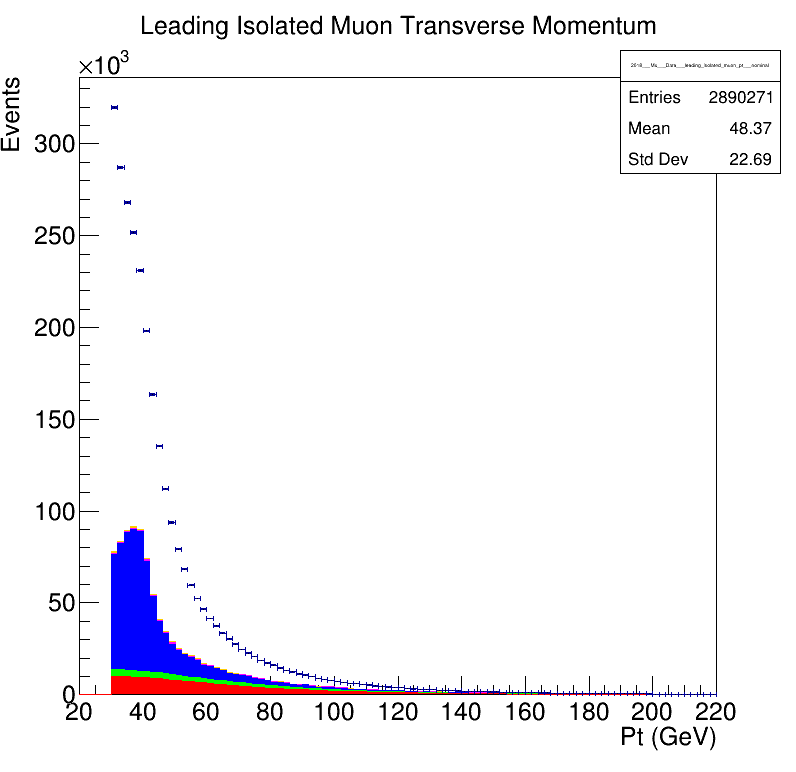

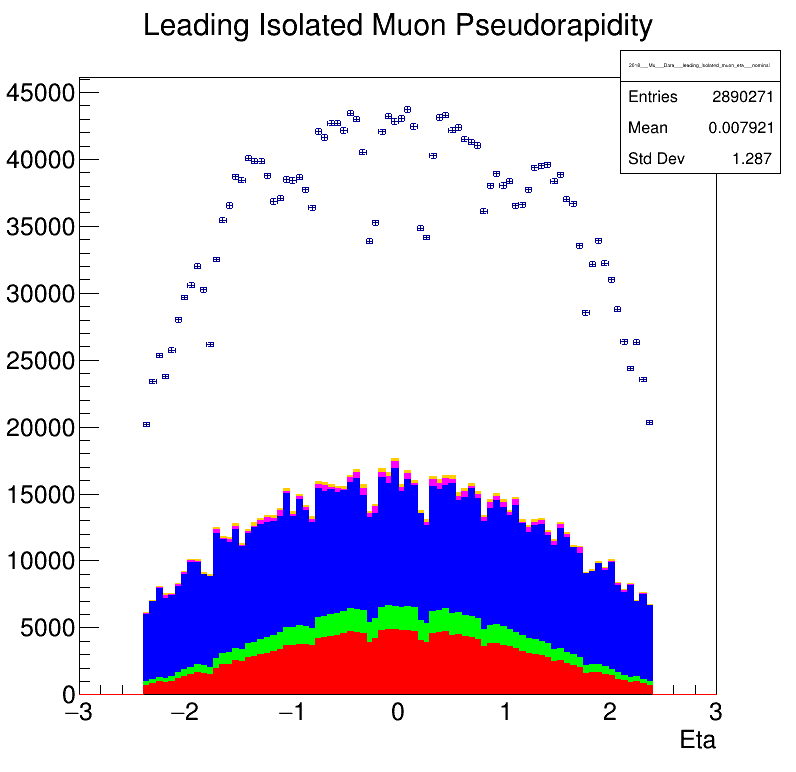

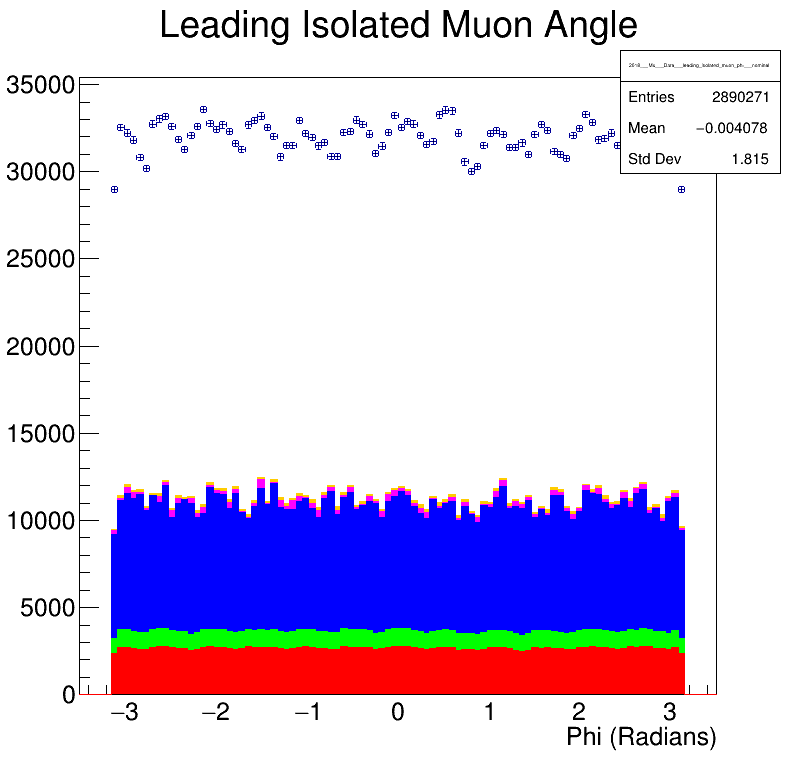

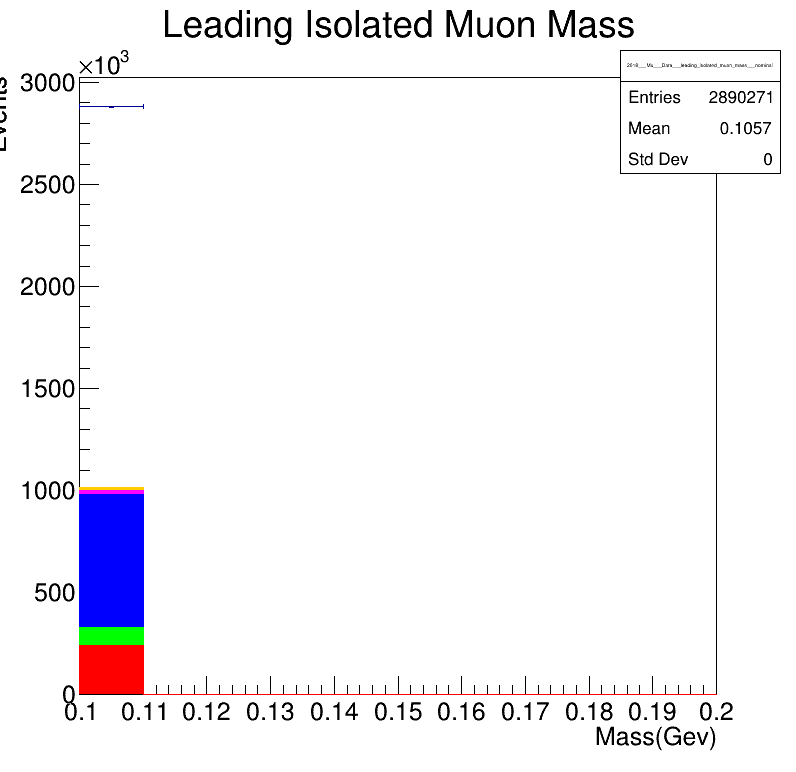

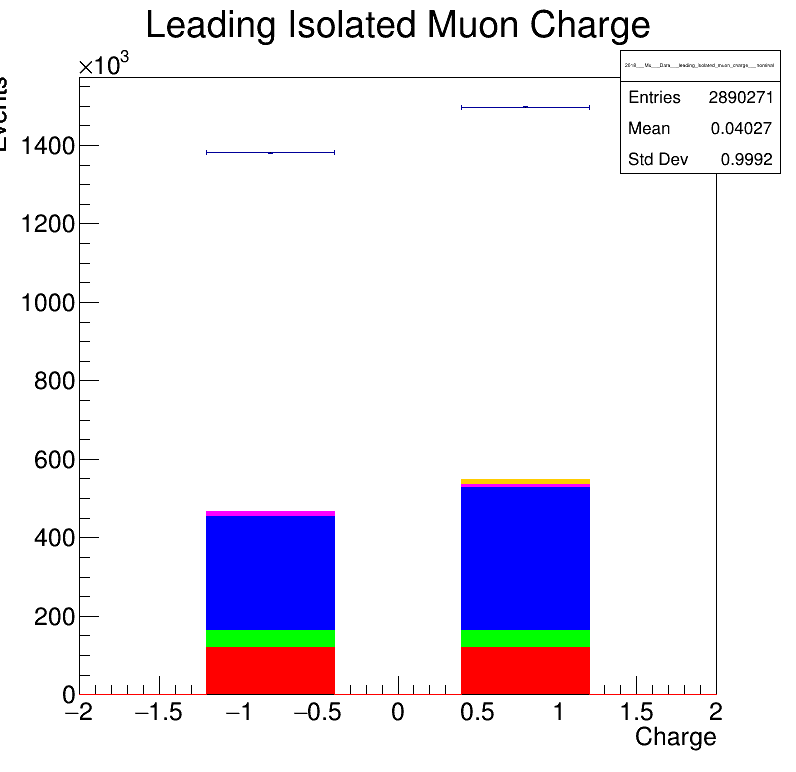

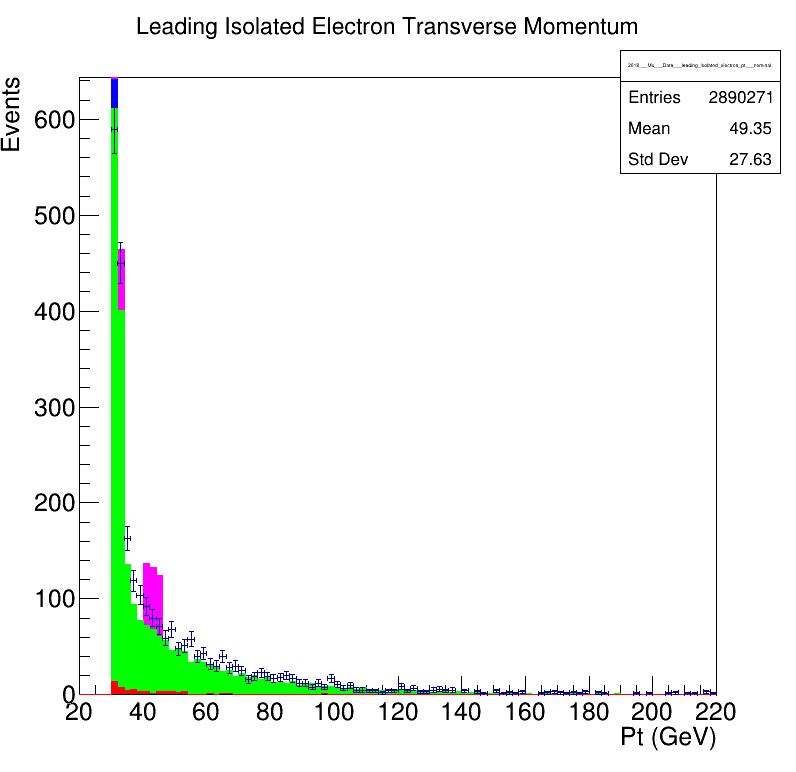

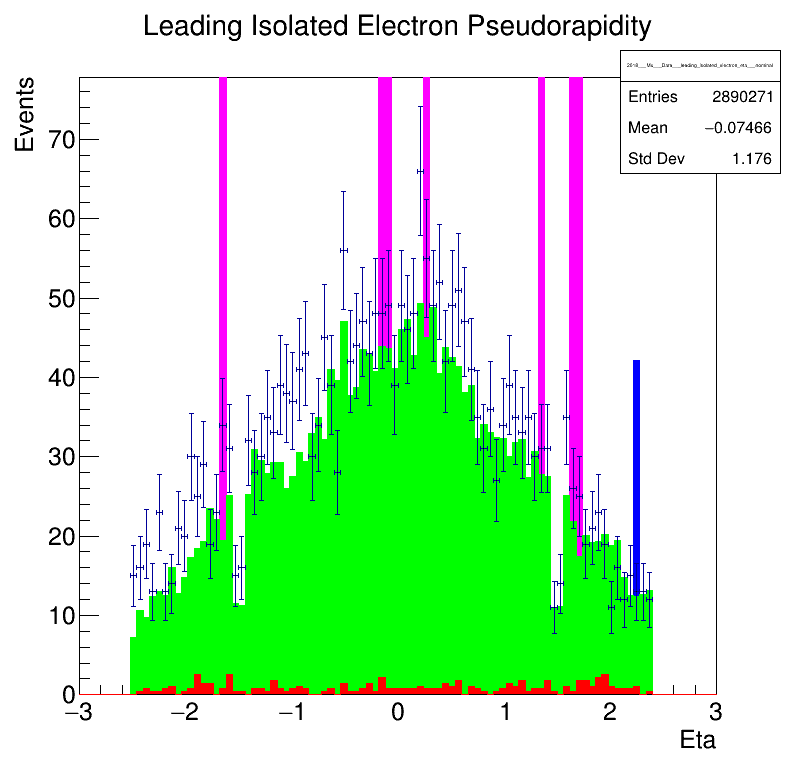

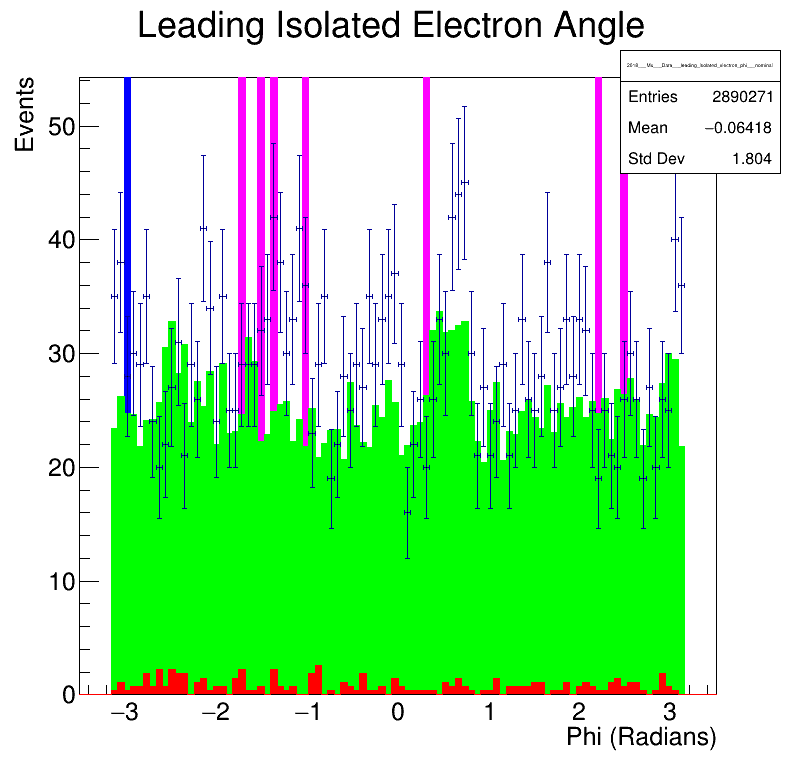

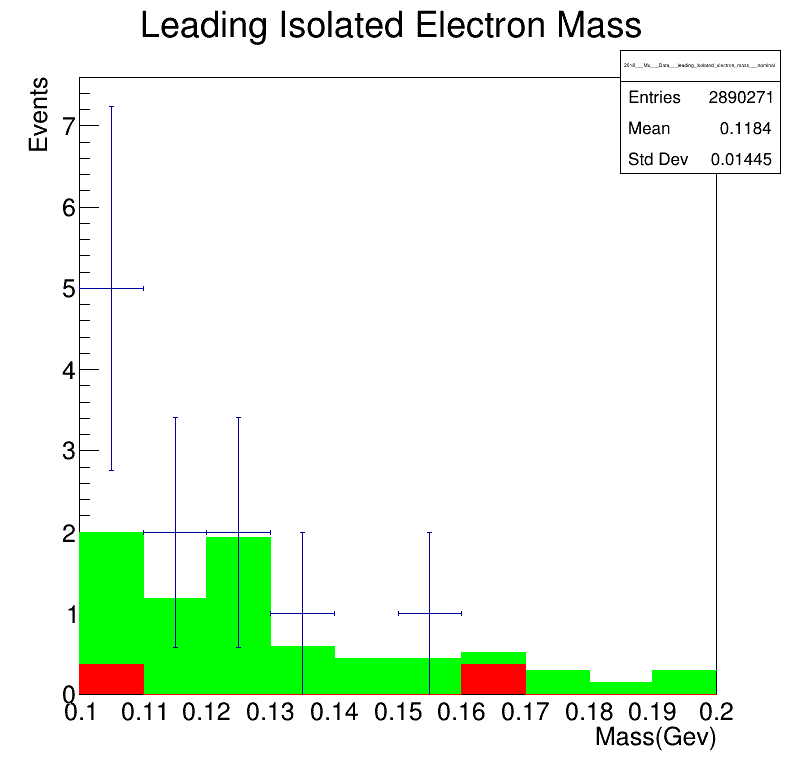

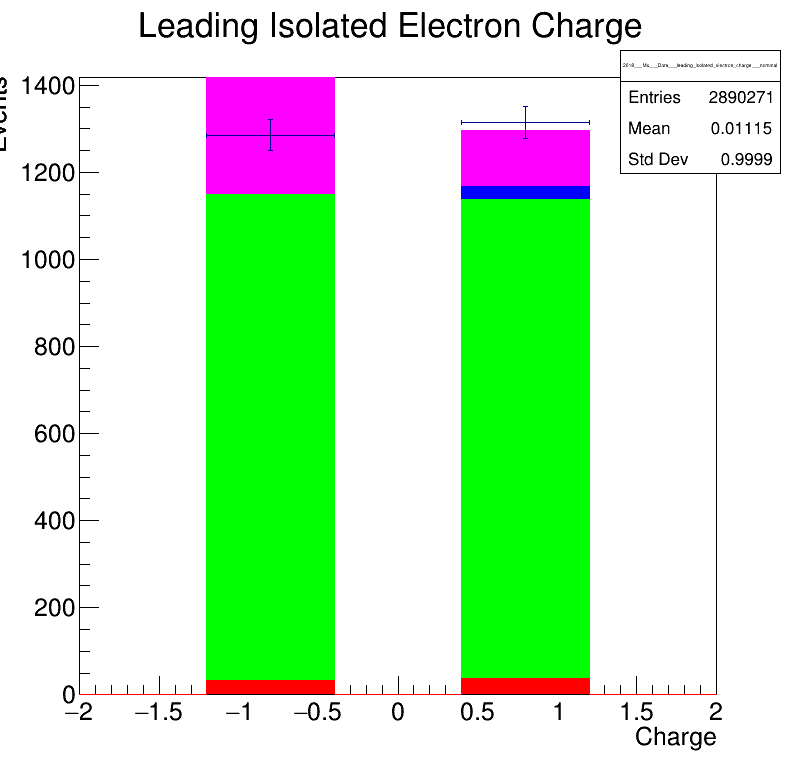

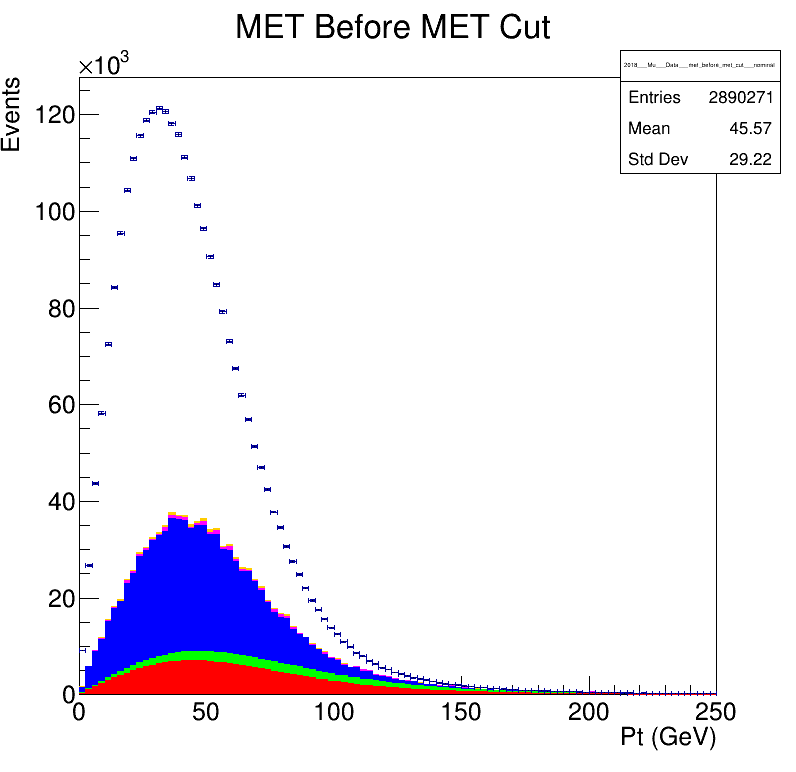

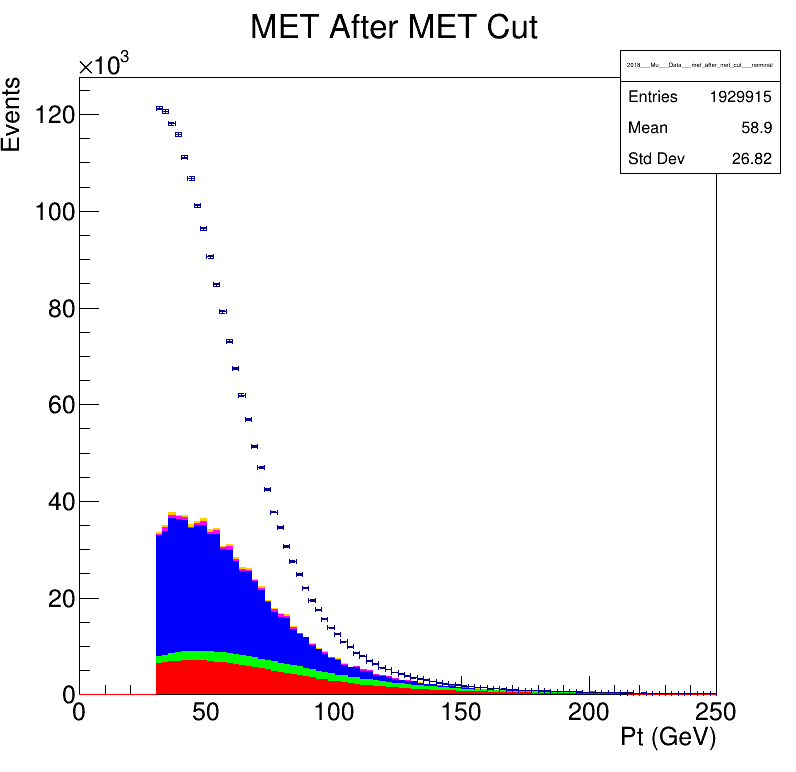

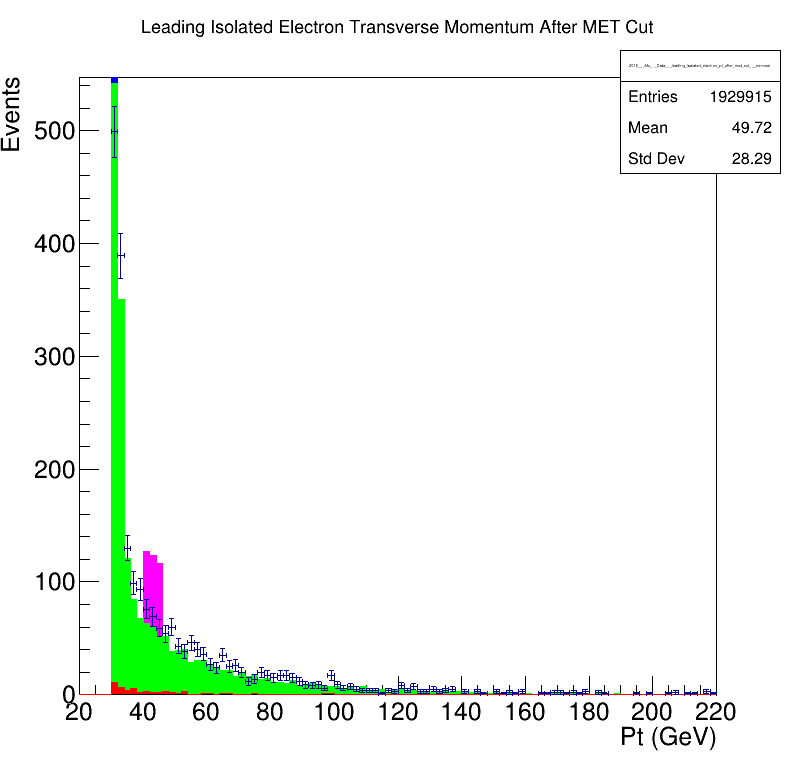

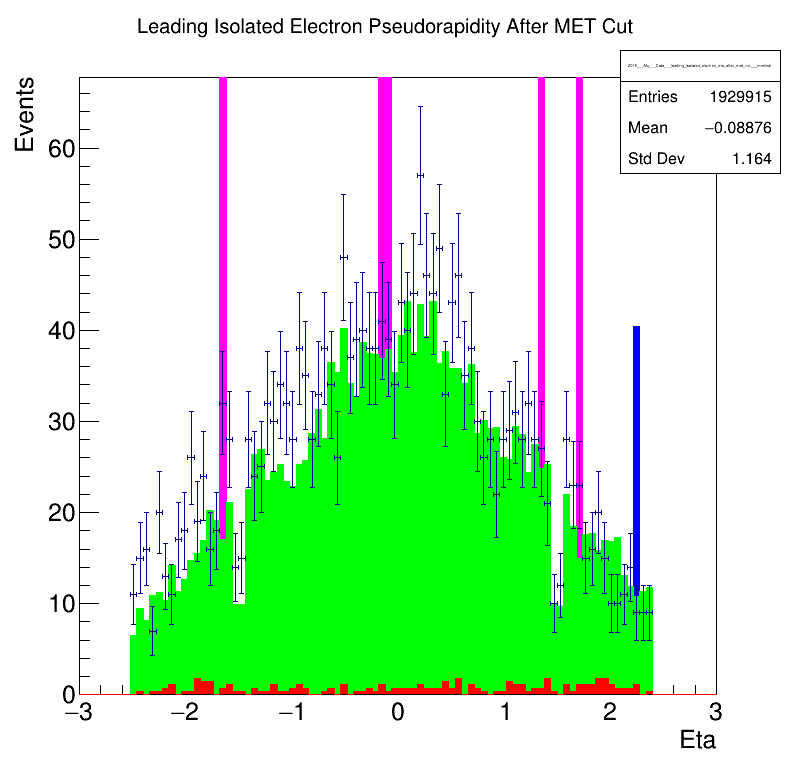

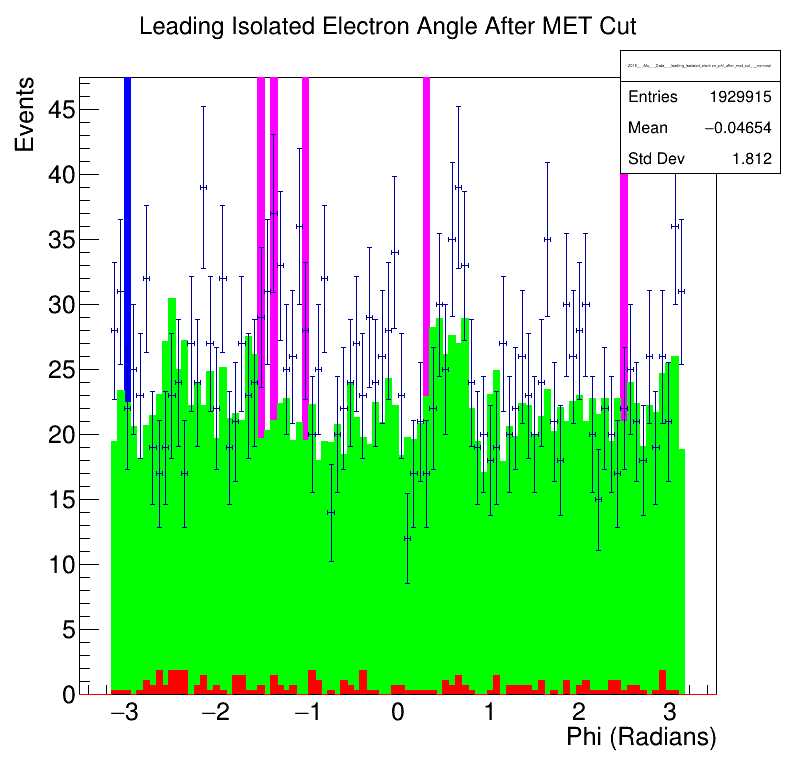

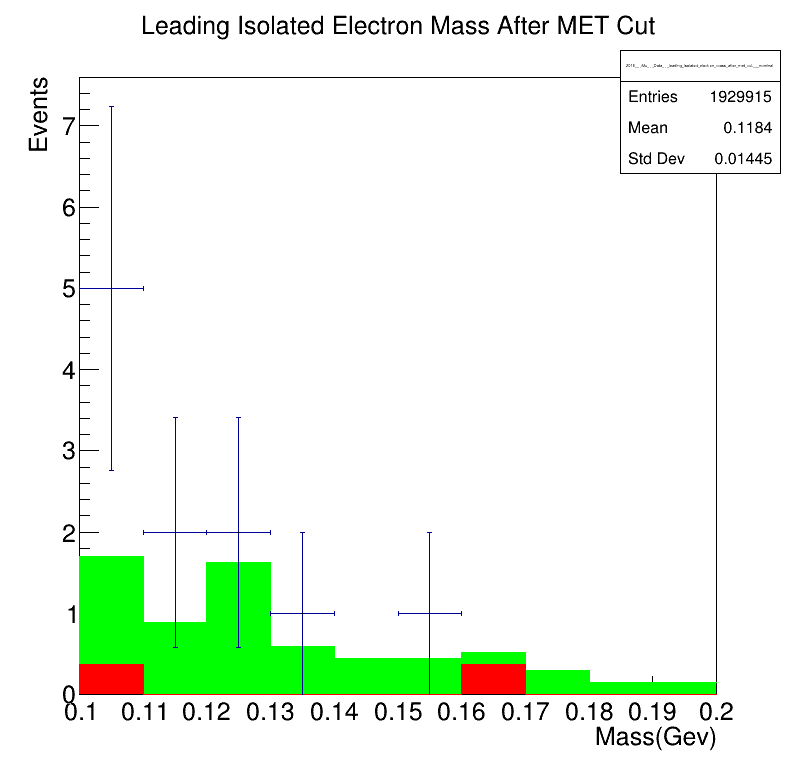

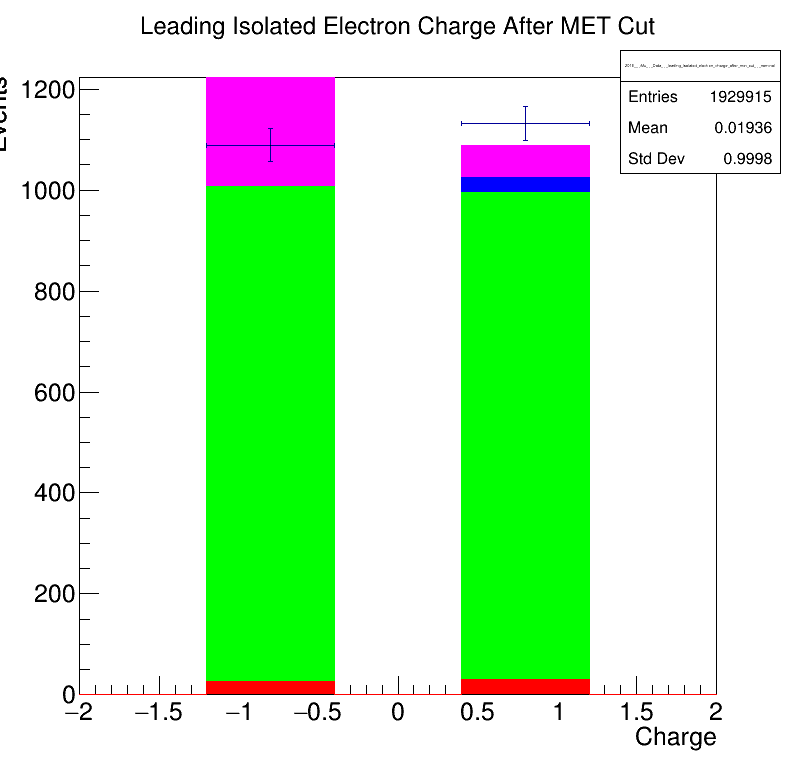

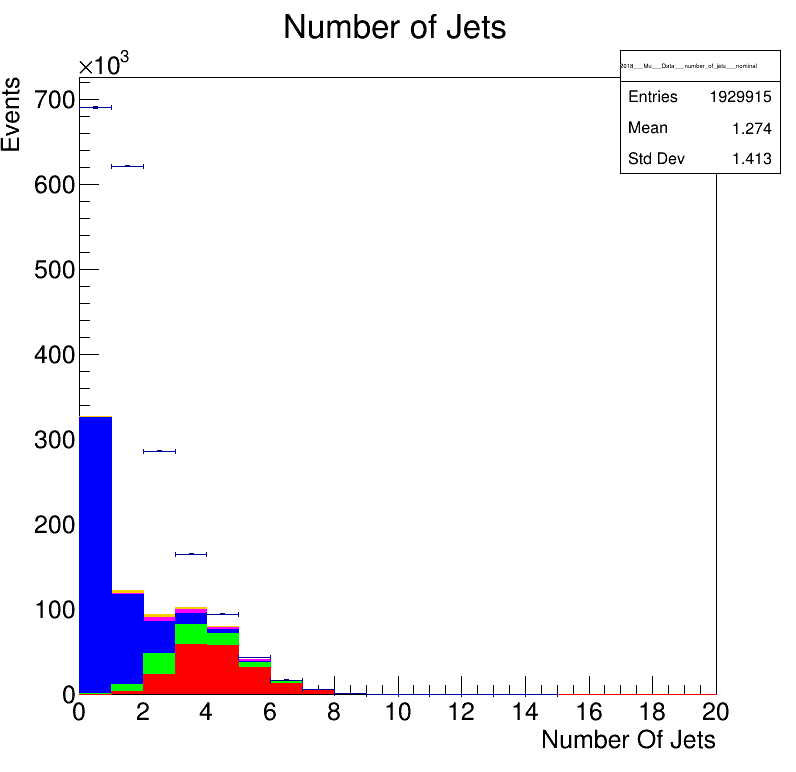

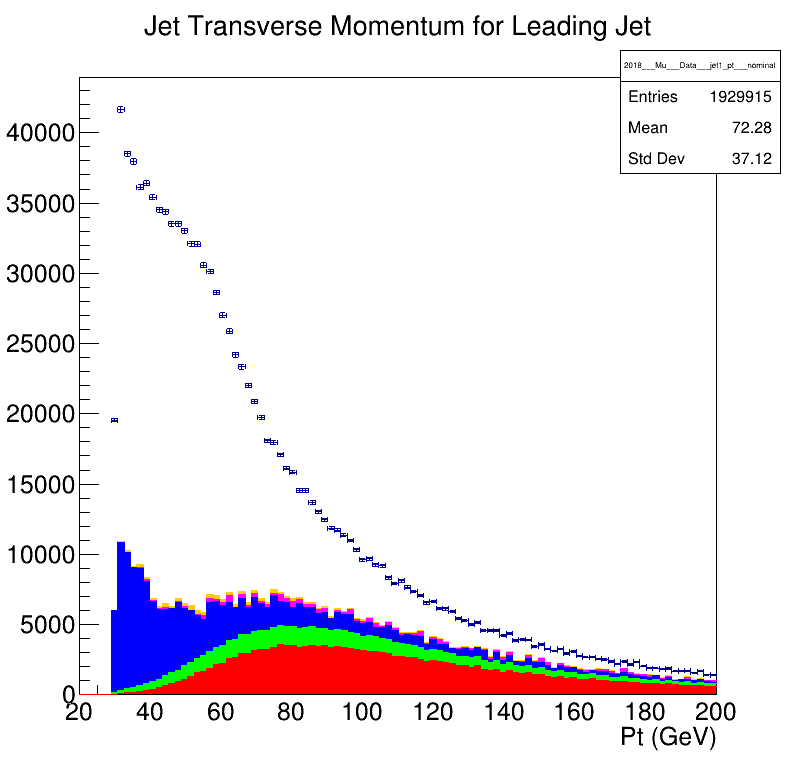

In [9]:
#Load histograms from file(s)
MonteCarlo = dict()
RealData = dict()

MonteCarlo["leading_isolated_muon_pt"] = dict()
MonteCarlo["leading_isolated_muon_eta"] = dict()
MonteCarlo["leading_isolated_muon_phi"] = dict()
MonteCarlo["leading_isolated_muon_mass"] = dict()
MonteCarlo["leading_isolated_muon_charge"] = dict()
MonteCarlo["leading_isolated_electron_pt"] = dict()
MonteCarlo["leading_isolated_electron_eta"] = dict()
MonteCarlo["leading_isolated_electron_phi"] = dict()
MonteCarlo["leading_isolated_electron_mass"] = dict()
MonteCarlo["leading_isolated_electron_charge"] = dict()
MonteCarlo["met_before_met_cut"] = dict()
MonteCarlo["met_after_met_cut"] = dict()
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"] = dict()
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"] = dict()
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"] = dict()
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"] = dict()
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_pt_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_eta_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_phi_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_mass_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_charge_after_met_cut"] = dict()
MonteCarlo["number_of_jets"] = dict()
MonteCarlo["jet1_pt"] = dict()
MonteCarlo["jet2_pt"] = dict()
MonteCarlo["jet1_eta"] = dict()
MonteCarlo["jet2_eta"] = dict()
MonteCarlo["jet1_phi"] = dict()
MonteCarlo["jet2_phi"] = dict()

RealData["leading_isolated_muon_pt"] = dict()
RealData["leading_isolated_muon_eta"] = dict()
RealData["leading_isolated_muon_phi"] = dict()
RealData["leading_isolated_muon_mass"] = dict()
RealData["leading_isolated_muon_charge"] = dict()
RealData["leading_isolated_electron_pt"] = dict()
RealData["leading_isolated_electron_eta"] = dict()
RealData["leading_isolated_electron_phi"] = dict()
RealData["leading_isolated_electron_mass"] = dict()
RealData["leading_isolated_electron_charge"] = dict()
RealData["met_before_met_cut"] = dict()
RealData["met_after_met_cut"] = dict()
# RealData["leading_isolated_muon_pt_after_met_cut"] = dict()
# RealData["leading_isolated_muon_eta_after_met_cut"] = dict()
# RealData["leading_isolated_muon_phi_after_met_cut"] = dict()
# RealData["leading_isolated_muon_mass_after_met_cut"] = dict()
# RealData["leading_isolated_muon_charge_after_met_cut"] = dict()
RealData["leading_isolated_electron_pt_after_met_cut"] = dict()
RealData["leading_isolated_electron_eta_after_met_cut"] = dict()
RealData["leading_isolated_electron_phi_after_met_cut"] = dict()
RealData["leading_isolated_electron_mass_after_met_cut"] = dict()
RealData["leading_isolated_electron_charge_after_met_cut"] = dict()
RealData["number_of_jets"] = dict()
RealData["jet1_pt"] = dict()
RealData["jet2_pt"] = dict()
RealData["jet1_eta"] = dict()
RealData["jet2_eta"] = dict()
RealData["jet1_phi"] = dict()
RealData["jet2_phi"] = dict()

MonteCarlo["leading_isolated_muon_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt___nominal")
RealData["leading_isolated_muon_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta___nominal")
RealData["leading_isolated_muon_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi___nominal")
RealData["leading_isolated_muon_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass___nominal")
RealData["leading_isolated_muon_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass___nominal") 
MonteCarlo["leading_isolated_muon_charge"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge___nominal")
RealData["leading_isolated_muon_charge"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_electron_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_pt___nominal")
MonteCarlo["leading_isolated_electron_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_pt___nominal")
MonteCarlo["leading_isolated_electron_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_pt___nominal")
MonteCarlo["leading_isolated_electron_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_pt___nominal")
MonteCarlo["leading_isolated_electron_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_pt___nominal")
RealData["leading_isolated_electron_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_pt___nominal")
MonteCarlo["leading_isolated_electron_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_eta___nominal")
MonteCarlo["leading_isolated_electron_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_eta___nominal")
MonteCarlo["leading_isolated_electron_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_eta___nominal")
MonteCarlo["leading_isolated_electron_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_eta___nominal")
MonteCarlo["leading_isolated_electron_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_eta___nominal")
RealData["leading_isolated_electron_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_eta___nominal")
MonteCarlo["leading_isolated_electron_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_phi___nominal")
MonteCarlo["leading_isolated_electron_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_phi___nominal")
MonteCarlo["leading_isolated_electron_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_phi___nominal")
MonteCarlo["leading_isolated_electron_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_phi___nominal")
MonteCarlo["leading_isolated_electron_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_phi___nominal")
RealData["leading_isolated_electron_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_phi___nominal")
MonteCarlo["leading_isolated_electron_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_mass___nominal")
MonteCarlo["leading_isolated_electron_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_mass___nominal")
MonteCarlo["leading_isolated_electron_mass"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_mass___nominal")
MonteCarlo["leading_isolated_electron_mass"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_mass___nominal")
MonteCarlo["leading_isolated_electron_mass"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_mass___nominal")
RealData["leading_isolated_electron_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_mass___nominal") 
MonteCarlo["leading_isolated_electron_charge"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_charge___nominal")
MonteCarlo["leading_isolated_electron_charge"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_charge___nominal")
MonteCarlo["leading_isolated_electron_charge"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_charge___nominal")
MonteCarlo["leading_isolated_electron_charge"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_charge___nominal")
MonteCarlo["leading_isolated_electron_charge"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_charge___nominal")
RealData["leading_isolated_electron_charge"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_charge___nominal")
MonteCarlo["met_before_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___met_before_met_cut___nominal")
RealData["met_before_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___met_before_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___met_after_met_cut___nominal")
RealData["met_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___met_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt_after_met_cut___nominal")
# RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta_after_met_cut___nominal")
# RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi_after_met_cut___nominal")
# RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass_after_met_cut___nominal")
# RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass_after_met_cut___nominal") 
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge_after_met_cut___nominal")
# MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge_after_met_cut___nominal")
# RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_pt_after_met_cut___nominal")
RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_eta_after_met_cut___nominal")
RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_phi_after_met_cut___nominal")
RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_mass_after_met_cut___nominal")
RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_mass_after_met_cut___nominal") 
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_charge_after_met_cut___nominal")
RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["number_of_jets"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jets___nominal")
RealData["number_of_jets"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jets___nominal")
MonteCarlo["jet1_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_pt___nominal")
RealData["jet1_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_pt___nominal")
MonteCarlo["jet2_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_pt___nominal")
RealData["jet2_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_eta___nominal")
MonteCarlo["jet1_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_eta___nominal")
RealData["jet1_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_eta___nominal")
MonteCarlo["jet2_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_eta___nominal")
RealData["jet2_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_eta___nominal")
MonteCarlo["jet1_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_phi___nominal")
RealData["jet1_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_phi___nominal")
MonteCarlo["jet2_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_phi___nominal")
RealData["jet2_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_phi___nominal")

S = dict()
S["leading_isolated_muon_pt"] = ROOT.THStack("s_leading_isolated_muon_pt", "Leading Isolated Muon Transverse Momentum; Pt (GeV);Events")
S["leading_isolated_muon_eta"] = ROOT.THStack("s_leading_isolated_muon_eta", "Leading Isolated Muon Pseudorapidity; Eta; Events")
S["leading_isolated_muon_phi"] = ROOT.THStack("s_leading_isolated_muon_phi", "Leading Isolated Muon Angle; Phi (Radians); Events")
S["leading_isolated_muon_mass"] = ROOT.THStack("s_leading_isolated_muon_mass", "Leading Isolated Muon Mass; Mass(Gev); Events")
S["leading_isolated_muon_charge"] = ROOT.THStack("s_leading_isolated_muon_charge", "Leading Isolated Muon Charge; Charge; Events")
S["leading_isolated_electron_pt"] = ROOT.THStack("s_leading_isolated_electron_pt", "Leading Isolated Electron Transverse Momentum; Pt (GeV);Events")
S["leading_isolated_electron_eta"] = ROOT.THStack("s_leading_isolated_electron_eta", "Leading Isolated Electron Pseudorapidity; Eta; Events")
S["leading_isolated_electron_phi"] = ROOT.THStack("s_leading_isolated_electron_phi", "Leading Isolated Electron Angle; Phi (Radians); Events")
S["leading_isolated_electron_mass"] = ROOT.THStack("s_leading_isolated_electron_mass", "Leading Isolated Electron Mass; Mass(Gev); Events")
S["leading_isolated_electron_charge"] = ROOT.THStack("s_leading_isolated_electron_charge", "Leading Isolated Electron Charge; Charge; Events")
S["met_before_met_cut"] = ROOT.THStack("s_met_before_met_cut", "MET Before MET Cut; Pt (GeV); Events")
S["met_after_met_cut"] = ROOT.THStack("s_met_after_met_cut", "MET After MET Cut; Pt (GeV); Events")
# S["leading_isolated_muon_pt_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_pt_after_met_cut", "Leading Isolated Muon Transverse Momentum After MET Cut; Pt (GeV);Events")
# S["leading_isolated_muon_eta_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_eta_after_met_cut", "Leading Isolated Muon Pseudorapidity After MET Cut; Eta; Events")
# S["leading_isolated_muon_phi_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_phi_after_met_cut", "Leading Isolated Muon Angle After MET Cut; Phi (Radians); Events")
# S["leading_isolated_muon_mass_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_mass_after_met_cut", "Leading Isolated Muon Mass After MET Cut; Mass(Gev); Events")
# S["leading_isolated_muon_charge_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_charge_after_met_cut", "Leading Isolated Muon Charge After MET Cut; Charge; Events")
S["leading_isolated_electron_pt_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_pt_after_met_cut", "Leading Isolated Electron Transverse Momentum After MET Cut; Pt (GeV);Events")
S["leading_isolated_electron_eta_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_eta_after_met_cut", "Leading Isolated Electron Pseudorapidity After MET Cut; Eta; Events")
S["leading_isolated_electron_phi_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_phi_after_met_cut", "Leading Isolated Electron Angle After MET Cut; Phi (Radians); Events")
S["leading_isolated_electron_mass_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_mass_after_met_cut", "Leading Isolated Electron Mass After MET Cut; Mass(Gev); Events")
S["leading_isolated_electron_charge_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_charge_after_met_cut", "Leading Isolated Electron Charge After MET Cut; Charge; Events")
S["number_of_jets"] = ROOT.THStack("s_number_of_jets", "Number of Jets; Number Of Jets; Events")
S["jet1_pt"] = ROOT.THStack("s_jet1_pt", "Jet Transverse Momentum for Leading Jet; Pt (GeV); Events")
S["jet2_pt"] = ROOT.THStack("s_jet2_pt", "Jet Transverse Momentum for Subleading Jet; Pt (GeV); Events")
S["jet1_eta"] = ROOT.THStack("s_jet1_eta", "Jet Pseudorapidity for Leading Jet; Eta; Events")
S["jet2_eta"] = ROOT.THStack("s_jet2_eta", "Jet Pseudorapidity for Subleading Jet; Eta; Events")
S["jet1_phi"] = ROOT.THStack("s_jet1_phi", "Jet Angle for Leading Jet; Phi (Radians); Events")
S["jet2_phi"] = ROOT.THStack("s_jet2_phi", "Jet Angle for Subleading Jet; Phi (Radians); Events")

for item in MonteCarlo:

    for sample, color in {"TTToSemiLeptonic" : ROOT.kRed, "TTTo2L2Nu" : ROOT.kGreen, "WJetsToLNu" : ROOT.kBlue, "ST_tW_top" : ROOT.kMagenta, "ST_tchannel_top" : ROOT.kOrange}.items():            
        MonteCarlo[item][sample].SetFillColor(color)
        MonteCarlo[item][sample].SetLineColor(color)
        S[item].Add(MonteCarlo[item][sample])

canvasas = dict()

canvas0 = ROOT.TCanvas("c_leading_isolated_muon_pt", "", 800, 800)
RealData["leading_isolated_muon_pt"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_pt"].Draw("HIST S SAME")
RealData["leading_isolated_muon_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas0.Draw()
canvasas['0'] = canvas0

canvas1 = ROOT.TCanvas("c_leading_isolated_muon_eta", "", 800, 800)
RealData["leading_isolated_muon_eta"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_eta"].Draw("HIST S SAME")
RealData["leading_isolated_muon_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas1.Draw()
canvasas['1'] = canvas1

canvas2 = ROOT.TCanvas("c_leading_isolated_muon_phi", "", 800, 800)
RealData["leading_isolated_muon_phi"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_phi"].Draw("HIST S SAME")
RealData["leading_isolated_muon_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas2.Draw()
canvasas['2'] = canvas2

canvas3 = ROOT.TCanvas("c_leading_isolated_muon_mass", "", 800, 800)
RealData["leading_isolated_muon_mass"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_mass"].Draw("HIST S SAME")
RealData["leading_isolated_muon_mass"]["SingleMuon2018"].Draw("PE1 SAME")
canvas3.Draw()
canvasas['3'] = canvas3

canvas4 = ROOT.TCanvas("c_leading_isolated_muon_charge", "", 800, 800)
RealData["leading_isolated_muon_charge"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_charge"].Draw("HIST S SAME")
RealData["leading_isolated_muon_charge"]["SingleMuon2018"].Draw("PE1 SAME")
canvas4.Draw()
canvasas['4'] = canvas4

canvas5 = ROOT.TCanvas("c_leading_isolated_electron_pt", "", 800, 800)
RealData["leading_isolated_electron_pt"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_pt"].Draw("HIST S SAME")
RealData["leading_isolated_electron_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas5.Draw()
canvasas['5'] = canvas5

canvas6 = ROOT.TCanvas("c_leading_isolated_electron_eta", "", 800, 800)
RealData["leading_isolated_electron_eta"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_eta"].Draw("HIST S SAME")
RealData["leading_isolated_electron_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas6.Draw()
canvasas['6'] = canvas6

canvas7 = ROOT.TCanvas("c_leading_isolated_electron_phi", "", 800, 800)
RealData["leading_isolated_electron_phi"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_phi"].Draw("HIST S SAME")
RealData["leading_isolated_electron_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas7.Draw()
canvasas['7'] = canvas7

canvas8 = ROOT.TCanvas("c_leading_isolated_electron_mass", "", 800, 800)
RealData["leading_isolated_electron_mass"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_mass"].Draw("HIST S SAME")
RealData["leading_isolated_electron_mass"]["SingleMuon2018"].Draw("PE1 SAME")
canvas8.Draw()
canvasas['8'] = canvas8

canvas9 = ROOT.TCanvas("c_leading_isolated_electron_charge", "", 800, 800)
RealData["leading_isolated_electron_charge"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_charge"].Draw("HIST S SAME")
RealData["leading_isolated_electron_charge"]["SingleMuon2018"].Draw("PE1 SAME")
canvas9.Draw()
canvasas['9'] = canvas9

canvas10 = ROOT.TCanvas("c_met_before_met_cut", "", 800, 800)
RealData["met_before_met_cut"]["SingleMuon2018"].Draw("PE1")
S["met_before_met_cut"].Draw("HIST S SAME")
RealData["met_before_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas10.Draw()
canvasas['10'] = canvas10

canvas11 = ROOT.TCanvas("c_met_after_met_cut", "", 800, 800)
RealData["met_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["met_after_met_cut"].Draw("HIST S SAME")
RealData["met_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas11.Draw()
canvasas['11'] = canvas11

# canvas12 = ROOT.TCanvas("c_leading_isolated_muon_pt_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_pt_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas12.Draw()
# canvasas['12'] = canvas12

# canvas13 = ROOT.TCanvas("c_leading_isolated_muon_eta_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_eta_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas13.Draw()
# canvasas['13'] = canvas13

# canvas14 = ROOT.TCanvas("c_leading_isolated_muon_phi_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_phi_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas14.Draw()
# canvasas['14'] = canvas14

# canvas15 = ROOT.TCanvas("c_leading_isolated_muon_mass_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_mass_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas15.Draw()
# canvasas['15'] = canvas15

# canvas16 = ROOT.TCanvas("c_leading_isolated_muon_charge_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_charge_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas16.Draw()
# canvasas['16'] = canvas16

canvas17 = ROOT.TCanvas("c_leading_isolated_electron_pt_after_met_cut", "", 800, 800)
RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_pt_after_met_cut"].Draw("HIST S SAME")
RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas17.Draw()
canvasas['17'] = canvas17

canvas18 = ROOT.TCanvas("c_leading_isolated_electron_eta_after_met_cut", "", 800, 800)
RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_eta_after_met_cut"].Draw("HIST S SAME")
RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas18.Draw()
canvasas['18'] = canvas18

canvas19 = ROOT.TCanvas("c_leading_isolated_electron_phi_after_met_cut", "", 800, 800)
RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_phi_after_met_cut"].Draw("HIST S SAME")
RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas19.Draw()
canvasas['19'] = canvas19

canvas20 = ROOT.TCanvas("c_leading_isolated_electron_mass_after_met_cut", "", 800, 800)
RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_mass_after_met_cut"].Draw("HIST S SAME")
RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas20.Draw()
canvasas['20'] = canvas20

canvas21 = ROOT.TCanvas("c_leading_isolated_electron_charge_after_met_cut", "", 800, 800)
RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_electron_charge_after_met_cut"].Draw("HIST S SAME")
RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
canvas21.Draw()
canvasas['21'] = canvas21

canvas22 = ROOT.TCanvas("c_number_of_jets", "", 800, 800)
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1")
S["number_of_jets"].Draw("HIST S SAME")
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1 SAME")
canvas22.Draw()
canvasas['22'] = canvas22

canvas23 = ROOT.TCanvas("c_jet1_pt", "", 800, 800)
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1")
S["jet1_pt"].Draw("HIST S SAME")
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas23.Draw()
canvasas['23'] = canvas23

canvas24 = ROOT.TCanvas("c_jet2_pt", "", 800, 800)
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1")
S["jet2_pt"].Draw("HIST S SAME")
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas24.Draw()
canvasas['24'] = canvas24

canvas25 = ROOT.TCanvas("c_jet1_eta", "", 800, 800)
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1")
S["jet1_eta"].Draw("HIST S SAME")
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas25.Draw()
canvasas['25'] = canvas25

canvas26 = ROOT.TCanvas("c_jet2_eta", "", 800, 800)
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1")
S["jet2_eta"].Draw("HIST S SAME")
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas26.Draw()
canvasas['26'] = canvas26

canvas27 = ROOT.TCanvas("c_jet1_phi", "", 800, 800)
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1")
S["jet1_phi"].Draw("HIST S SAME")
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas27.Draw()
canvasas['27'] = canvas27

canvas28 = ROOT.TCanvas("c_jet2_phi", "", 800, 800)
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1")
S["jet2_phi"].Draw("HIST S SAME")
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas28.Draw()
canvasas['28'] = canvas28

In [10]:
for kn, k in enumerate(canvasas.keys()):
    
    if kn == 0:
        print("Opening PDF")
        canvasas[k].SaveAs('June14_2022.pdf(')
    
    elif kn == len(canvasas) - 1:
        print("Closing PDF")
        canvasas[k].SaveAs('June14_2022.pdf)')
    
    else:
        canvasas[k].SaveAs('June14_2022.pdf')

Opening PDF
Closing PDF


Info in <TCanvas::Print>: pdf file June14_2022.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file June14_2022.pdf
Info in

In [ ]:
era = "2017"
channel = "Mu"

def DrawStack(MonteCarlo, Data, separator = "___"):
    era, channel, sample, variable, systematic = list(MonteCarlo.values())[0].GetName().split(separator)
    name = "_".join(["stack", era, channel, variable, systematic])
    colors = {"TTToSemiLeptonic" : ROOT.kRed}
    stack = ROOT.THStack(name, "")
    
    canvas = ROOT.TCanvas(name.replace("stack", "canvas"), "", 800, 800)
  
    
    for sample, hist in MonteCarlo.items():
        hist.SetFillColor(colors.get(sample, ROOT.kMagenta))
        hist.SetLineColor(colors.get(sample, ROOT.kMagenta))
        stack.Add(hist)
        
    aggregate = None
    
    for sample, hist in Data.items():
        if aggregate == None:
            aggregate = hist.Clone(hist.GetName().replace("sample", "allData"))
            
        else:
            aggregate += hist
    
    maxima = []
    minima = []
    maxima.append(stack.GetMaximum())
    maxima.append(aggregate.GetMaximum())
    minima.append(stack.GetMinimum())
    minima.append(aggregate.GetMinimum())
    
    stack.SetMinimum(min(minima))
    stack.SetMaximum(max(maxima))
    
    stack.Draw("HIST S")
    aggregate.Draw("PE1 SAME")
    
    canvas.BuildLegend()
    
    return stack, aggregate, canvas

for kn, variable in enumerate(variables):
        
    MonteCarlo, RealData = GetHistos(f, era, channel, variable)
    
    stack, aggregate, canvas = DrawStack(MonteCarlo, RealData)
       
    if kn == 0:
        print("Opening PDF")
        canvas.SaveAs('December2.pdf(')

    elif kn == len(variables) - 1:
        print("Closing PDF")
        canvas.SaveAs('December2.pdf)')

    else:
        canvas.SaveAs('December2.pdf')
        
    canvas.SaveAs(variable + 'December2.png')

In [11]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

